<a href="https://colab.research.google.com/github/susmithachaganti/OIBSIP/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

**Basics Operations**

In [ ]:
df = pd.read_csv("/content/car_data.csv")
df.head(4)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.shape
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [ ]:
df.dtypes

,0
Car_Name,object
Year,int64
Selling_Price,float64
Present_Price,float64
Driven_kms,int64
Fuel_Type,object
Selling_type,object
Transmission,object
Owner,int64


In [ ]:
df.dropna(inplace=True)
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


**Define features and target**

In [ ]:
X = df.drop(columns=['Selling_Price'])  # Target is 'Selling_Price'
y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



**Standardize numerical features**

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test

array([[-1.24299601,  0.80907587, -0.77381497, -0.32344157,  0.48236665,
         1.33816952, -2.64575131, -0.18569534],
       [ 0.26954204,  0.80907587,  0.67861818, -0.63518537,  0.48236665,
        -0.74728947,  0.37796447, -0.18569534],
       [ 1.23911771, -0.58039253,  0.21045093,  0.53852285, -1.88024551,
        -0.74728947,  0.37796447, -0.18569534],
       [-2.01865655, -0.92775963, -0.77381497, -0.06006356,  0.48236665,
         1.33816952,  0.37796447,  3.52821143],
       [ 0.34710809, -0.23302543,  1.23707482,  0.05967767,  0.48236665,
        -0.74728947,  0.37796447, -0.18569534],
       [ 0.23075901,  0.46170877,  0.1569461 ,  0.11632788, -1.88024551,
        -0.74728947,  0.37796447, -0.18569534],
       [-0.62246758,  0.46170877, -0.67349342, -0.27555466,  0.48236665,
         1.33816952,  0.37796447, -0.18569534],
       [-0.04072218,  0.11434167, -0.73925977, -0.70653687,  0.48236665,
         1.33816952,  0.37796447, -0.18569534],
       [-1.32056207,  0.80907587

In [ ]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

array([ 2.97491895,  8.32612847,  6.0161235 , -1.38172371,  9.27940633,
        7.06928951,  1.30824607,  0.74154082,  1.38400041,  7.12180339,
        8.69584861,  0.54647028,  8.53755625,  3.52559619,  6.461831  ,
        3.03854609,  0.42667599, 10.91368809,  1.74417072,  2.29195225,
        0.37662088,  7.76798131,  6.17213021,  2.60498874,  0.84816117,
        3.69954086,  5.35530228,  2.8301809 ,  2.11511377,  1.72142608,
        0.42317787,  8.82614032, -0.60965683,  2.2555362 ,  8.22536901,
        4.57720813,  7.36810266,  7.71076849,  2.85141326,  8.10873551,
        3.98313701,  4.3789598 ,  4.40312603,  0.55049612,  6.91084914,
        0.46147134,  7.43952702, 11.46949761,  3.12745561,  4.9423416 ,
        6.81243382,  2.15400554, 20.55225973, 16.78374986,  7.09182007,
        9.8550337 ,  4.48118171,  8.65492286,  1.84936153,  7.64066408,
        0.21224031])

In [ ]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([ 0.4433, 10.32  ,  5.01  ,  0.2094,  8.0587,  6.727 ,  1.1326,
        0.8589,  0.464 ,  6.641 ,  8.5415,  1.1096,  7.7683,  0.4519,
        5.3005,  2.598 ,  1.1441, 14.6331,  0.4643,  1.562 ,  0.3344,
        7.7878,  4.724 ,  2.7225,  0.5039,  3.4735,  5.3745,  3.2125,
        1.1773,  1.1608,  0.4048,  8.1788,  0.4639,  2.487 ,  8.0283,
        4.0315,  6.7378,  6.1305,  2.4835,  6.6828,  4.9542,  3.7248,
        4.7115,  0.5678,  6.2675,  0.7127,  8.006 ,  7.18  ,  2.911 ,
        3.5895,  4.981 ,  1.529 , 22.8972, 20.6695,  6.498 ,  9.9883,
        5.141 ,  8.7332,  2.9794,  6.599 ,  0.2425])

Linear Regression - MSE: 3.54, R² Score: 0.85
Random Forest - MSE: 0.81, R² Score: 0.96


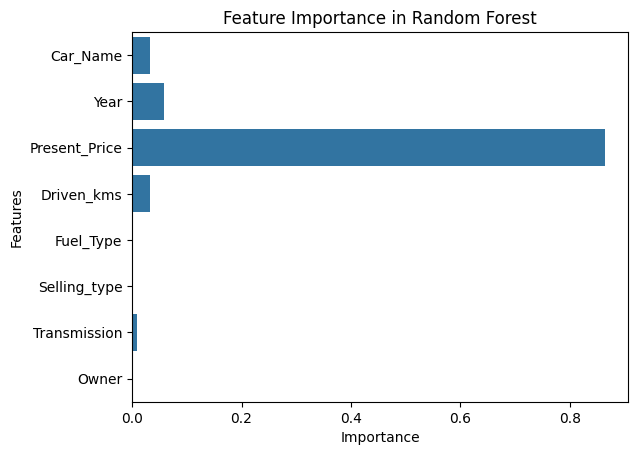

In [ ]:
# Evaluate models
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R² Score: {r2:.2f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Plot feature importance (for Random Forest)
importances = rf_model.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

<ipython-input-25-c5bacd316584>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['Selling_Price'],palette='pastel')


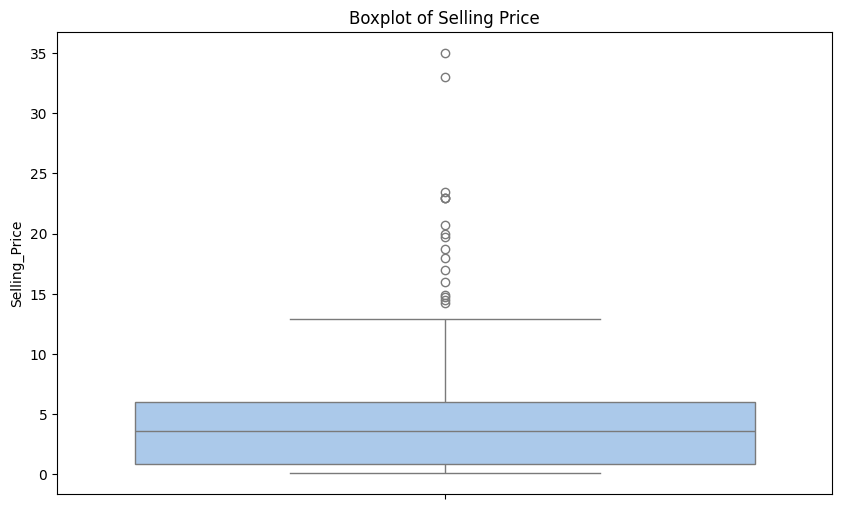

In [ ]:
# Check for outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(df['Selling_Price'],palette='pastel')
plt.title('Boxplot of Selling Price')
plt.show()

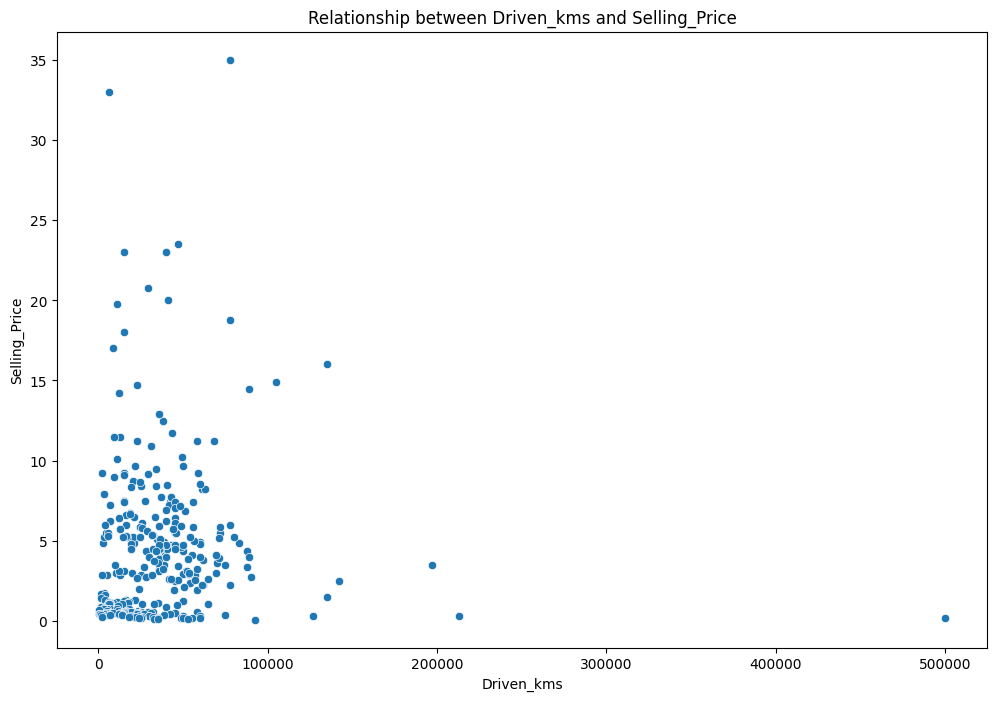

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.title('Relationship between Driven_kms and Selling_Price')
plt.show()

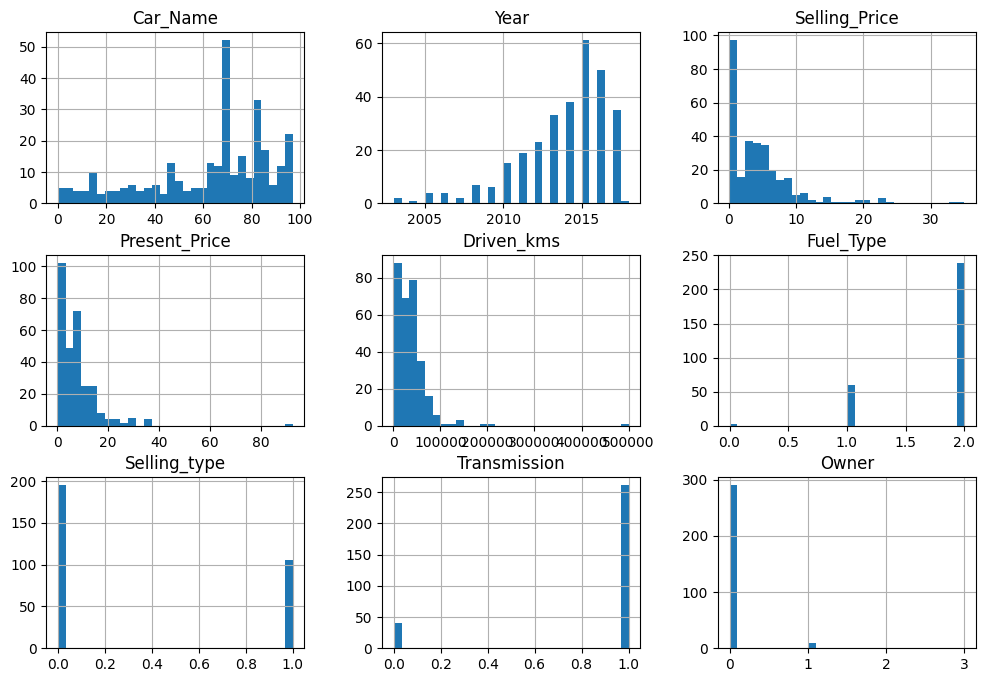

In [ ]:
df.hist(figsize=(12, 8), bins=30)  # Histogram of numerical features
plt.show()


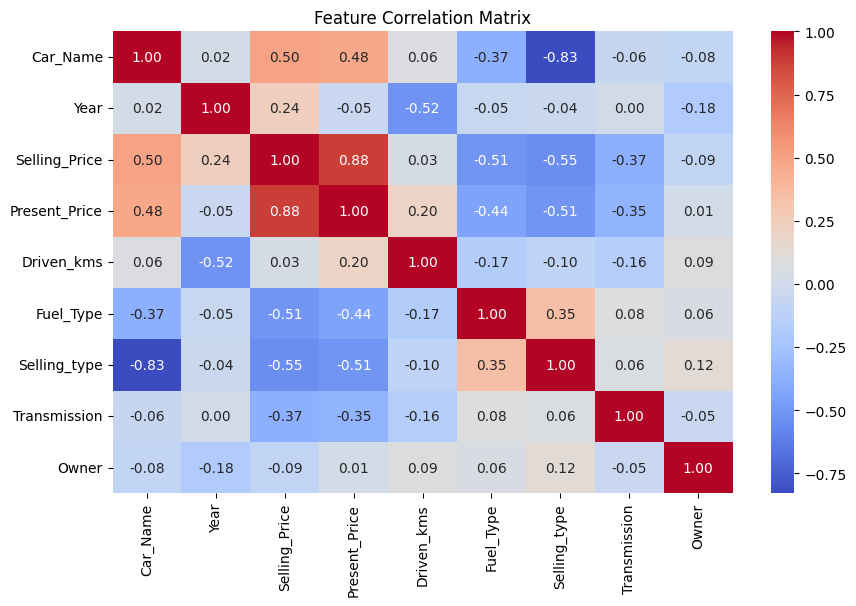

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


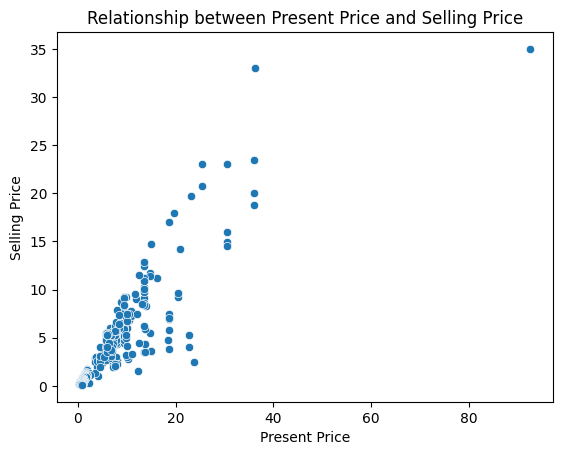

In [ ]:
sns.scatterplot(x=df['Present_Price'], y=df['Selling_Price'])
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
plt.title("Relationship between Present Price and Selling Price")
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

evaluate_model(y_test, y_pred_poly, "Polynomial Regression")


Polynomial Regression - MSE: 0.57, R² Score: 0.98


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
